<a href="https://colab.research.google.com/github/RajkumarGalaxy/StructuredData/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Beginners Guide to Linear Regression  

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_diabetes

Load data

In [48]:
data = load_diabetes()
data.keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [49]:
features = pd.DataFrame(data['data'], columns=data['feature_names'])
target = pd.Series(data['target'], name='target')
feat.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


# Simple Linear Regression

In [34]:
X = features['bmi'].values.reshape(-1,1)
y = target.values.reshape(-1,1)

Fit the data to the model

In [35]:
simple = LinearRegression()
simple.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

What are the weights and intercept?

In [36]:
simple.intercept_

array([152.13348416])

In [37]:
simple.coef_

array([[949.43526038]])

Predictions

In [53]:
calc_pred = simple.intercept_ + (X*simple.coef_)

pred = simple.predict(X)

In [55]:
(calc_pred == pred).all()

True

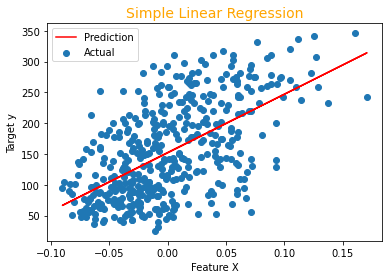

In [50]:
plt.scatter(X,y, label='Actual')
plt.plot(X,pred, '-r', label='Prediction')
plt.xlabel('Feature X')
plt.ylabel('Target y')
plt.title('Simple Linear Regression', color='orange', size=14)
plt.legend()
plt.show()

Mean Squared Error

In [56]:
mean_squared_error(y, pred)

3890.4565854612724

R-Squared value

In [51]:
simple.score(X,y)

0.3439237602253803

# Multiple Linear Regression 

Choose more columns

In [57]:
columns = ['age', 'bmi', 'bp', 's3', 's5']
columns

['age', 'bmi', 'bp', 's3', 's5']

Visuaize the data

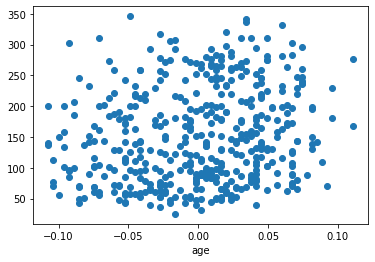

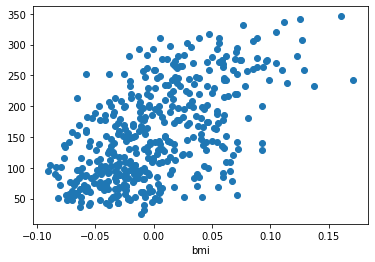

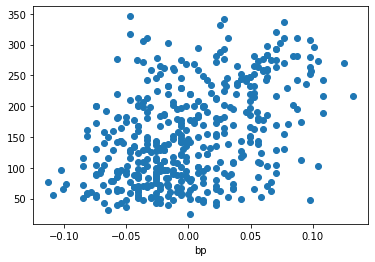

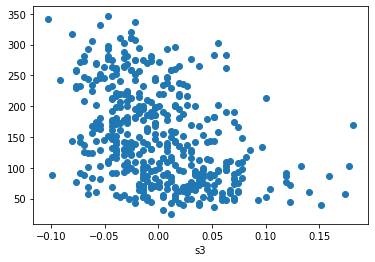

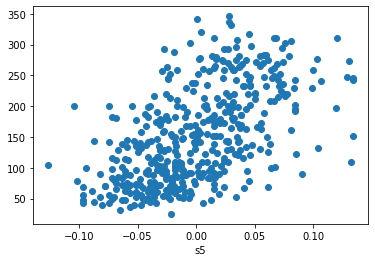

In [58]:
for i in columns:
  plt.scatter(features[i], y)
  plt.xlabel(str(i))
  plt.show() 

Perform Train-Validation split

In [85]:
from sklearn.model_selection import train_test_split

X = features[columns]
# 70% training data, 30% validation data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=6)

Build model and fit the data

In [86]:
multi = LinearRegression()
multi.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

What are the weights and intercept?

In [90]:
multi.coef_

array([[ -79.7520873 ,  595.40113097,  311.49720444, -159.42906869,
         496.82564004]])

In [91]:
multi.intercept_

array([150.16282646])

Predictions, error and R-squared value

In [87]:
pred = multi.predict(X_val)


In [88]:
mean_squared_error(y_val, pred)

2920.317471016246

In [89]:
multi.score(X_train, y_train), multi.score(X_val, y_val)

(0.49307015364236917, 0.46527175799338705)

# Using statsmodels Library 

Import the library, build the model and train it

In [102]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     67.50
Date:                Wed, 19 May 2021   Prob (F-statistic):           3.91e-49
Time:                        13:08:31   Log-Likelihood:                -1917.0
No. Observations:                 353   AIC:                             3846.
Df Residuals:                     347   BIC:                             3869.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        150.1628      2.967     50.610      0.000     144.327     155.999
age          -79.7521     67.192     -1.187      0.236    -211.907      52.403
bmi          595.4011     76.489      7.784      0.000     444.960     745.842
bp           311.4972     72.873      4.274      0.000     168.168     454.826
s3          -159.4291     71.616     -2.226      0.027    -300.284     -18.574
s5           496.8256     77.142      6.440      0.000     345.102     648.549
==============================================================================
Omnibus:                        8.844   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                6.630
Skew:                           0.225   Prob(JB):                       0.0363
Kurtosis:                       2.502   Cond. No.                         30.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Prediction, error calculation

In [99]:
# Constant (intercept) must be added manually
X_val = sm.add_constant(X_val)
preds = results.predict(X_val)

In [101]:
mean_squared_error(y_val, preds)

2920.3174710162575

Both methods perform identically

### Thank you for your time!